# Analysis Project: Picogreen Yield vs. User

In [1]:
#Import necessary functions
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

#Makes a white backround with gray horizontal gridmarks at y-values
sns.set_style("whitegrid")

In [2]:
#ps = patch_seq csv file
ps = pd.read_csv("patch_seq_log_mouse.csv")

In [3]:
#list_initial = list with specific columns used from csv file
list_initial = ["Date", "User", "Rig #", "Picogreen yield (pg)", "PCR cycles", "SM_QC_PF", "Bad dates"]
ps = ps[list_initial]
ps.head()

,Date,User,Rig #,Picogreen yield (pg),PCR cycles,SM_QC_PF,Bad dates
0,170104,P1,5,NaN,18.0,pass,x
1,170104,P1,5,NaN,18.0,pass,x
2,170104,P1,5,NaN,18.0,pass,x
3,170104,P1,5,NaN,18.0,pass,x
4,170104,P1,5,NaN,18.0,pass,x


### Categorizing & Filtering the columns

In [4]:
#Changing Date Format
ps["Date"] = pd.to_datetime(ps["Date"], format = "%y%m%d", errors = "coerce")

#Categories
ps["User"] = ps["User"].astype("category")
ps["Rig #"] = ps["Rig #"].astype("category")
ps["PCR cycles"] = ps["PCR cycles"].astype("category")
ps["SM_QC_PF"] = ps["SM_QC_PF"].astype("category")
ps["Bad dates"] = ps["Bad dates"].astype("category")

#Filtering Columns
ps = ps[ps["PCR cycles"] == 21]      #Shows 21 pcr cycles
ps = ps[ps["SM_QC_PF"] != "cnt"]     #Shows everything except (cnt = control)
ps = ps[ps["Bad dates"] != "x"]      #Shows everthing except (x = contaminated)

#Dropping blank columns
ps = ps.drop("Bad dates", 1)
ps.dropna(subset = ["User", "Picogreen yield (pg)", "SM_QC_PF"], inplace = True)
ps.head()

,Date,User,Rig #,Picogreen yield (pg),PCR cycles,SM_QC_PF
3809,2017-09-06,P2,7,11558.52,21.0,pass
3810,2017-09-06,P2,7,13476.13,21.0,pass
3811,2017-09-08,P2,7,12861.93,21.0,pass
3812,2017-09-08,P2,7,14560.27,21.0,pass
3813,2017-09-08,P9,7,4516.30,21.0,fail


In [5]:
ps.tail()

,Date,User,Rig #,Picogreen yield (pg),PCR cycles,SM_QC_PF
5219,2018-02-02,P2,3,11734.39,21.0,pass
5220,2018-02-02,P1,1,12432.76,21.0,pass
5221,2018-02-02,P1,1,15742.80,21.0,pass
5222,2018-02-02,P1,1,11731.41,21.0,pass
5223,2018-02-02,P1,1,17712.60,21.0,pass


## Info

In [6]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1366 entries, 3809 to 5223
Data columns (total 6 columns):
Date                    1366 non-null datetime64[ns]
User                    1366 non-null category
Rig #                   1354 non-null category
Picogreen yield (pg)    1366 non-null float64
PCR cycles              1366 non-null category
SM_QC_PF                1366 non-null category
dtypes: category(4), datetime64[ns](1), float64(1)
memory usage: 38.4 KB


In [7]:
ps.User.value_counts()

P8    385
P9    326
P2    238
PB    198
PA    169
P6     32
P1     18
P5      0
P3      0
P0      0
Name: User, dtype: int64

## Swarmplot, Violinplot & Boxplot of Picogreen Yield vs User

In [8]:
#Users = P1(Kristen), P2(Rusty), P8(Lindsay), P9(Lisa), PA(Ram), PB(Dijon)
#No data for P1 because Kristen was out during that period.
#Restricted yield below 100000 (1 large outlier: 200000)
#Data: 9/06/2017 - 2/02/2018 

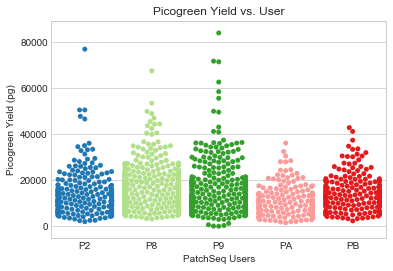

In [9]:
sp = sns.swarmplot(x = "User", y = "Picogreen yield (pg)", data = ps[ps["Picogreen yield (pg)"] < 100000], 
                   order = ["P2", "P8", "P9", "PA", "PB"], 
                   palette = ["#1f78b4", "#b2df8a", "#33a02c", "#fb9a99", "#e31a1c"]).set_title("Picogreen Yield vs. User")
plt.xlabel("PatchSeq Users")
plt.ylabel("Picogreen Yield (pg)") #Redundant ylabel
plt.savefig("swarm_picogreen_yield_vs_user")

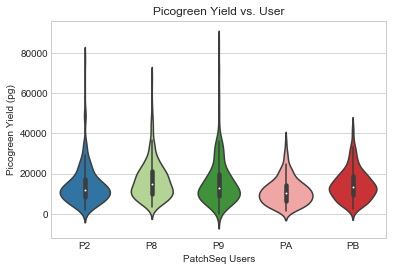

In [10]:
vp = sns.violinplot(x = "User", y = "Picogreen yield (pg)", data = ps[ps["Picogreen yield (pg)"] < 100000], 
                    order = ["P2", "P8", "P9", "PA", "PB"], 
                    palette = ["#1f78b4", "#b2df8a", "#33a02c", "#fb9a99", "#e31a1c"]).set_title("Picogreen Yield vs. User")
plt.xlabel("PatchSeq Users")
plt.ylabel("Picogreen Yield (pg)") #Redundant ylabel
plt.savefig("vio_picogreen_yield_vs_user")

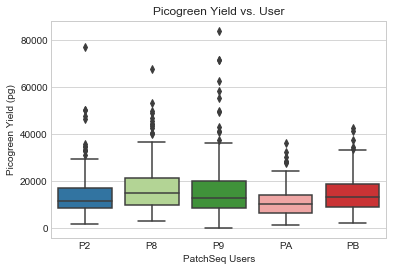

In [11]:
bp = sns.boxplot(x = "User", y = "Picogreen yield (pg)", data = ps[ps["Picogreen yield (pg)"] < 100000], 
                 order = ["P2", "P8", "P9", "PA", "PB"], 
                 palette = ["#1f78b4", "#b2df8a", "#33a02c", "#fb9a99", "#e31a1c"]).set_title("Picogreen Yield vs. User")
plt.xlabel("PatchSeq Users")
plt.ylabel("Picogreen Yield (pg)") #Redundant ylabel
plt.savefig("box_picogreen_yield_vs_user")

## Extra Box Plot with outliers included

Text(0,0.5,u'Picogreen Yield (pg)')

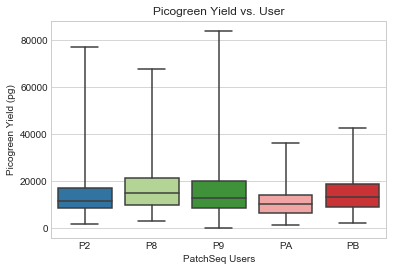

In [12]:
#whis = np.inf includes the outliers
bp = sns.boxplot(x = "User", y = "Picogreen yield (pg)", data = ps[ps["Picogreen yield (pg)"] < 100000], 
                 order = ["P2", "P8", "P9", "PA", "PB"], 
                 palette = ["#1f78b4", "#b2df8a", "#33a02c", "#fb9a99", "#e31a1c"], 
                 whis = np.inf).set_title("Picogreen Yield vs. User")
plt.xlabel("PatchSeq Users")
plt.ylabel("Picogreen Yield (pg)") #Redundant ylabel

## Extras

In [13]:
plt.style.available

[u'seaborn-darkgrid',
 u'Solarize_Light2',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'_classic_test',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'fast',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']

In [14]:
#To create colors for individual bars, boxes, violins, use palette = [list]
#To use just one palette for whole data, use palette = "color"